## Student information
Milja Lempinen <br>
520600 <br>
mmlemp@utu.fi  <br>
Date  <br>

______________
# Data Analysis and Knowledge Discovery 2021 <br> Exercise 2, Data Understanding and Visualization

- This is the template for the second exercise. You can add more code and markup cells, as long as the flow of the notebook stays fluent and logical.

- The aim of this exercise is to practice data understanding; check the content and validity of the data, correct and select data, and apply basic descriptive statistics and visualization for further understanding.

- Two datasets are used: shipdata1_2021.csv and shipdata2_2021.csv. The same data will be used in the next exercise, with same attributes, but in a more cleaned format.<br> 

### General guidance for exercises 

- Answer **all** questions below, even if you can't get your script to fully work
- Write clear and easily readable code, include explanations what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- +1 bonus point (grading *Pass with honors*) requires a **completely** correct solution and also thorough analysis. 
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat or email from course assistants.
- Note! Don't leave it to the last moment! No feedback service during weekends.

### Gather **all** packages needed for this notebook here:
- This does not mean that you can not use any packages not imported below, but the exercise can be done without importing any extras

In [267]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Show the plots inline in the notebook
%matplotlib inline

________

#  <font color = dimgrey> Know your data: an introduction to the data and domain knowledge </font>

The data used in this exercise is a subset from the Marine Traffic portal. More information available for example here:
- https://www.marinetraffic.com/blog/information-transmitted-via-ais-signal/
- https://www.diva-portal.org/smash/get/diva2:833998/FULLTEXT01.pdf
- https://www.marinetraffic.com/en/data/

The exercise data has the following columns/attributes:
- **MMSI**

    * Maritime Mobile Service Identity. A radio-identification number that uniquely identifies a ship. The first three numbers tell the nationality of the ship - for example finnish ships would have the number 266 preceding them. The following six digits are the identifying part unique to each ship. <br> 
    
- **Speed**
    * The speed (in knots x10) that the subject vessel is reporting according to AIS transmissions
- **COG**
    * Course Over Ground<br> COG=3600 means “not available”
- **Destination**
    * The Destination of the subject vessel according to the AIS transmissions
- **Ship_type**
    * The Shiptype of the subject vessel according to AIS transmissions -
- **Gross_tonnage**
    * unitless measure that calculates the moulded volume of all enclosed spaces of a ship
- **Length**
    * The overall Length (in metres) of the subject vessel
- **Breadth**
    * The Breadth (in metres) of the subject vessel

________
## <font color = dimgrey> 1. Data import </font> 

Datasets for this exercise are available via the following url-paths
- https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata1_2021.csv
- https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata2_2021.csv
_____________________

**a)** First load data files shipdata1.csv and shipdata2.csv using pandas.
-  *Note! Files were prepared by two different persons, so there are differences in the file formatting!*

In [268]:
# Here are the paths to the files
##################################
# Load shipdata1.csv
url1 = 'https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata1_2021.csv' 
# Load shipdata2.csv
url2 = 'https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata2_2021.csv'
#Print/show in notebook first 5 rows of both dataframes. 

In [269]:
ship1_df = pd.read_csv(url1)
ship2_df = pd.read_csv(url2)

**b)** Print/show in notebook first 5 rows of both dataframes. 

In [270]:
print(pd.DataFrame.head(ship1_df, 5))
print(pd.DataFrame.head(ship2_df, 5))

        MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
0  212209000  10.1000  64.3000      Hamina     Cargo           3416    94.9   
1  212436000  13.5256  77.0755      Hamina    Tanker           6280   116.9   
2  219082000   9.9000  74.7000      Hamina    Tanker           9980   141.2   
3  219083000  11.6038  74.8000      Hamina    Tanker           9980   141.2   
4  219426000  11.9203  56.3253      Hamina    Tanker           3219    99.9   

   Breadth  
0     15.3  
1     18.0  
2     21.9  
3     21.6  
4     15.0  
        MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
0  538002778  11,3631  74,6552      Porvoo    Tanker          30641     195   
1  636016752     11,7     74,6      Porvoo    Tanker           3853    92,9   
2  244870429  11,7126  69,5662      Porvoo    Tanker           7251     115   
3  305653000  10,8253  56,4266      Porvoo     Cargo           6668  107,03   
4  235060255  11,7311     80,9    Primorsk    Tanker

**c)** For the vessel with **MMSI 231844000**, search for gross tonnage, length and breadth from one of the datasets 

In [271]:
vessel = 0
x = 0
z = 0

print(231844000 in ship1_df['MMSI'].values)
print(231844000 in ship2_df['MMSI'].values)

for i in ship1_df['MMSI']:
    if ship1_df['MMSI'].at[x] == 231844000:
        vessel = x
        print('FOUND in ShipData1')
        print(ship1_df.loc[x, 'Gross_tonnage':'Breadth'])
    x+=1

    
for i in ship2_df['MMSI']:
    if ship2_df['MMSI'].at[z] == 231844000:
        vessel = z
        print('FOUND in ShipData2')
        print(ship12_df.loc[z, 'Gross_tonnage':'Breadth'])
    z+=1

True
False
FOUND in ShipData1
Gross_tonnage    2876
Length           88.9
Breadth          13.2
Name: 49, dtype: object


_________
## <font color = dimgrey> 2. Fix numeric data

**a)** The dataframes have one systematic difference in numerical values. Look at the previous printouts: **What is the difference?**

<font color = green> The difference is the data type of the numerical values. In the first dataframe, the data type is "float", while in the second dataframe the data type is "str" and the decimal is separated using a comma instead of a point.

In [272]:
# The data types 

print(type(ship1_df['Speed'].at[1]))
    
print(type(ship2_df['Speed'].at[1]))

<class 'numpy.float64'>
<class 'str'>


**b)** Fix this issue so that you correct shipdata2 dataframe to similar formatting as in shipdata1.

In [273]:
#The easiest way to fix this is to reload the data using correct attributes

ship2_df = pd.read_csv(url2, decimal=',')

**c)** Print first 5 rows of  the now fixed  shipdata2 dataframe. 

In [274]:
#Here the correction is visible

print(pd.DataFrame.head(ship2_df, 5))
print(type(ship2_df['Speed'].at[1]))

        MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
0  538002778  11.3631  74.6552      Porvoo    Tanker          30641  195.00   
1  636016752  11.7000  74.6000      Porvoo    Tanker           3853   92.90   
2  244870429  11.7126  69.5662      Porvoo    Tanker           7251  115.00   
3  305653000  10.8253  56.4266      Porvoo     Cargo           6668  107.03   
4  235060255  11.7311  80.9000    Primorsk    Tanker          23353  184.00   

   Breadth  
0    32.24  
1    15.30  
2    18.60  
3    18.42  
4    27.70  
<class 'numpy.float64'>


__________
## <font color = dimgrey> 3. Combine dataframes together

*Tip for this section: Each subtask can be easily done with one (or two) line(s) of code when using Pandas.*

**a)** Add an additional column/attribute Origin which indicates the origin of the data (values 1, 2, according to shipdata name). This is often helpful for possible detective work, if there are any further direpancies in the data.

In [275]:
ship1_df['Origin'] = 1
ship2_df['Origin'] = 2

print(pd.DataFrame.head(ship1_df, 5))
print(pd.DataFrame.head(ship2_df, 5))

        MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
0  212209000  10.1000  64.3000      Hamina     Cargo           3416    94.9   
1  212436000  13.5256  77.0755      Hamina    Tanker           6280   116.9   
2  219082000   9.9000  74.7000      Hamina    Tanker           9980   141.2   
3  219083000  11.6038  74.8000      Hamina    Tanker           9980   141.2   
4  219426000  11.9203  56.3253      Hamina    Tanker           3219    99.9   

   Breadth  Origin  
0     15.3       1  
1     18.0       1  
2     21.9       1  
3     21.6       1  
4     15.0       1  
        MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
0  538002778  11.3631  74.6552      Porvoo    Tanker          30641  195.00   
1  636016752  11.7000  74.6000      Porvoo    Tanker           3853   92.90   
2  244870429  11.7126  69.5662      Porvoo    Tanker           7251  115.00   
3  305653000  10.8253  56.4266      Porvoo     Cargo           6668  107.03   
4  2

**b)** Combine the two separate dataframes as one new dataframe.

In [276]:
shipdata_all = ship1_df.append(ship2_df, ignore_index=True)

**c)** Check a sample of the new dataframe by taking a random sample of six rows and printing it.

In [277]:
print(shipdata_all.sample(n=6, random_state=1))

          MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
42   477043500  11.9996  77.4823       Muuga    Tanker          61990   247.0   
36   256827000   9.8000  86.4867       Muuga    Tanker           7833   150.2   
93   215555000  13.8026  73.9815    Ust-Luga    Tanker          29327   183.0   
5    229998000  11.7433  70.9708      Hamina    Tanker           4364   122.0   
65   538002774  11.5935  67.3823      Porvoo    Tanker          30641   195.0   
108  636017596  11.1660  88.5264    Ust-Luga    Tanker          29767   183.0   

     Breadth  Origin  
42      44.0       1  
36      17.3       1  
93      32.2       2  
5       16.0       1  
65      32.2       1  
108     32.2       2  


**d)** Check the shape of the new dataframe, try using df.info(). What information can you find in the output?

In [278]:
shipdata_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MMSI           136 non-null    int64  
 1   Speed          136 non-null    float64
 2   COG            136 non-null    float64
 3   Destination    136 non-null    object 
 4   Ship_type      135 non-null    object 
 5   Gross_tonnage  136 non-null    int64  
 6   Length         136 non-null    float64
 7   Breadth        136 non-null    float64
 8   Origin         136 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 9.7+ KB


<font color = green> This command prints out that the dataframe has 9 columns with 136 rows. It also gives information on the data type of the columns as well as the amount of null-values in each column. </font>

__________
## <font color = lightcoral> 4. Data cleaning

**a)** Check if there are any missing data.

In [279]:
print(shipdata_all.isnull().sum())

MMSI             0
Speed            0
COG              0
Destination      0
Ship_type        1
Gross_tonnage    0
Length           0
Breadth          0
Origin           0
dtype: int64


<font color=green> There is one Ship_type -cell missing

**b)** Check if there any duplicate data; any vessel in the dataframe several times?

In [280]:
print(shipdata_all.duplicated().sum()) #This gives 0, because the indices are all different
print(shipdata_all.duplicated(subset=['MMSI']).sum())

shipdata_mmsi = shipdata_all['MMSI']

duplicates = shipdata_all[shipdata_mmsi.isin(shipdata_mmsi[shipdata_mmsi.duplicated()])]

print(duplicates)

0
2
         MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
66  538002778  11.3631  74.6552      Porvoo    Tanker          30641   195.0   
68  636016752  11.7000  74.6000      Porvoo    Tanker           3853    92.9   
69  538002778  11.3631  74.6552      Porvoo    Tanker          30641   195.0   
70  636016752  11.7000  74.6000      Porvoo    Tanker           3853    92.9   

    Breadth  Origin  
66    32.24       1  
68    15.30       1  
69    32.24       2  
70    15.30       2  


<font color=green> There are no true duplicates, but partials do exist. In this case, the duplicate is a vessel, but the 

**c)** Resolve missing data and remove duplicate data.

In [281]:
#Removing duplicates
shipdata_all.drop_duplicates(subset='MMSI', inplace=True)

#Resolving missing data
shipdata_all['Ship_type'].fillna('Unknown', inplace=True)

**d)** Print out proof that there are no more missing or duplicate data

In [282]:
print("The amount of duplicates: " + str(shipdata_all.duplicated(subset=['MMSI']).sum()))

print("Null values: " + str(shipdata_all.isnull().sum()))

The amount of duplicates: 0
Null values: MMSI             0
Speed            0
COG              0
Destination      0
Ship_type        0
Gross_tonnage    0
Length           0
Breadth          0
Origin           0
dtype: int64


____________
## <font color = Navy> 5. Descriptive statistics

####  a) Check data types and correct if needed

Because Python does not require separate variable declaration, it is always a good practice to check the data types. Check the data types for the attributes and 
- convert MMSI to object or string if needed (e.g. to exclude from numeric comparison)
- convert object or string typed numeric attributes to float.

In [283]:
print(shipdata_all.dtypes)

MMSI               int64
Speed            float64
COG              float64
Destination       object
Ship_type         object
Gross_tonnage      int64
Length           float64
Breadth          float64
Origin             int64
dtype: object


In [284]:
#Changing data types for MMSI and Gross_tonnage

shipdata_all = shipdata_all.astype({'MMSI': str, 'Gross_tonnage': float, 'Origin': str})

print(shipdata_all.dtypes)
print(shipdata_all.head())

MMSI              object
Speed            float64
COG              float64
Destination       object
Ship_type         object
Gross_tonnage    float64
Length           float64
Breadth          float64
Origin            object
dtype: object
        MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
0  212209000  10.1000  64.3000      Hamina     Cargo         3416.0    94.9   
1  212436000  13.5256  77.0755      Hamina    Tanker         6280.0   116.9   
2  219082000   9.9000  74.7000      Hamina    Tanker         9980.0   141.2   
3  219083000  11.6038  74.8000      Hamina    Tanker         9980.0   141.2   
4  219426000  11.9203  56.3253      Hamina    Tanker         3219.0    99.9   

   Breadth Origin  
0     15.3      1  
1     18.0      1  
2     21.9      1  
3     21.6      1  
4     15.0      1  


**b)** Print count, mean. Std, min, quartiles (25%, 50%, 75%) and max for all numeric attributes 
- *This can be done with one line - if your answer gets long consider changing your approach.*

In [285]:
print(shipdata_all.describe())

            Speed         COG  Gross_tonnage       Length     Breadth
count  134.000000  134.000000     134.000000   134.000000  134.000000
mean    10.453009   78.271204   13535.291045   136.669776   20.186716
std      1.955434   15.731984   18433.591631   124.040522    9.943960
min      5.500000   53.326400     100.000000    15.000000    5.000000
25%      8.961525   71.053100    2551.250000    88.925000   12.900000
50%     10.300000   74.850000    5348.500000   115.000000   16.900000
75%     11.709450   81.236900   15558.250000   160.810000   24.880000
max     17.082500  157.267300   81502.000000  1399.000000   48.040000


**b)** Print count, mean. Std, min, quartiles (25%, 50%, 75%) and max for all numeric attributes. Check the values. Does the comparison make sense here, taken also the meaning of each attribute (i.e. understand your data)?

In [286]:
# Script here

<font color = green> The count -attribute only tells the length of the dataframe, so it is not very useful. The other statistical calculations for all but COG make sense, since we get numerical data on all ship-related attributes. Gross tonnage doesn't have a unit so it is also harder to compare.

**c)** Choose Breadth and two (2) other numeric attributes that you would like to focus and know more. Print descriptive statistics only for these **but leave out everything else except mean, std and max**. 

- *Tip: check the type of the output of the function you used in the last step. What is the type and how could you subset it? What did you learn about pandas indexing in the first exercise?*

In [287]:
print(shipdata_all[['Breadth', 'Length', 'Speed']].describe().loc[['mean', 'std', 'max']])

        Breadth       Length      Speed
mean  20.186716   136.669776  10.453009
std    9.943960   124.040522   1.955434
max   48.040000  1399.000000  17.082500


 **d)** Descriptive statistics by Ship_type <br>
- Print the descriptive statistics now by each ship type for those three attributes used in the previous task.<br> 
"by" here means that you group by that variable.
- *Tip! A wide Pandas table can be easily rotated using transpose, for better readability in the jupyter notebook.*<br>

In [288]:
print(shipdata_all.groupby('Ship_type').describe().transpose())

Ship_type                   Cargo        Tanker         Tug  Unknown
Speed         count     67.000000     57.000000    9.000000      1.0
              mean       9.946178     11.363321    8.511111     10.0
              std        1.902921      1.706523    0.993031      NaN
              min        7.400000      5.500000    7.200000     10.0
              25%        8.600000     10.567300    7.900000     10.0
              50%        9.800000     11.612100    8.600000     10.0
              75%       10.858700     12.318700    9.100000     10.0
              max       17.082500     14.680500    9.900000     10.0
COG           count     67.000000     57.000000    9.000000      1.0
              mean      75.152142     78.986805   97.366667     74.6
              std       13.592337     15.003203   22.753242      NaN
              min       53.326400     56.325300   73.700000     74.6
              25%       66.818750     73.334800   79.300000     74.6
              50%       74.000000 

**e)** How many ship types there are? Which Ship type has the largest breadth?

<font color = green> There are three ship types, plus one unknown. The largest average breadth type is tanker. </font>

_______________
## <font color = forestgreen> 6. Visualizations </font>

### A few more words on matplotlib and seaborn

As you saw in the first exercise, matplotlib plotting is structured with the 'axes' and 'figure' objects. The meaning and the names of these can be somewhat confusing so here is a small example and explanation of them to avoid confusion in the future. This small explanation tries to help you avoid common mistakes and frustration. 
    
- The **<font color = dimgrey> figure </font>** object contains all plotting elements, in other words everything we see. You can think of it as a canvas where things are drawn. 
- A figure can have many **<font color = blue> axes </font>**. They are the objects you plot on to. The axes can even overlap and their position is defined relative to the figure. 
    
####  Seaborn and matplotlib
- Seaborn goes together with matplotlib, and can be thought to be an extension of it, but there are some things that can confuse you along the way if their relationship is presented like this. One tip in particular that one might have problems with is that in seaborn there are figure-level, axes-level plots. Figure level plots dont work with a matplotlib subplot and are used so that only one plot is made per figure. Axes level plots can be put into subplots like matplotlib plots as you saw in the first exercise. 
    
    
     
- Below is an example that illustrates how **<font color = dimgrey> figures </font>**and **<font color = blue> axes </font>** work together in matplotlib. The comments explain what is done in every row of code. <font color = green> You are encouraged to play around with it, but its not required in terms of the exercise" </font>. You can for example try to make a similar plot-inside-plot with the exercise data.
    

In [289]:
#Lets make some example data.
x_example_data = np.linspace(0,5,10)
y_example_data = x_example_data**2

Text(3, 5, 'This is a text object relative to the inner axes')

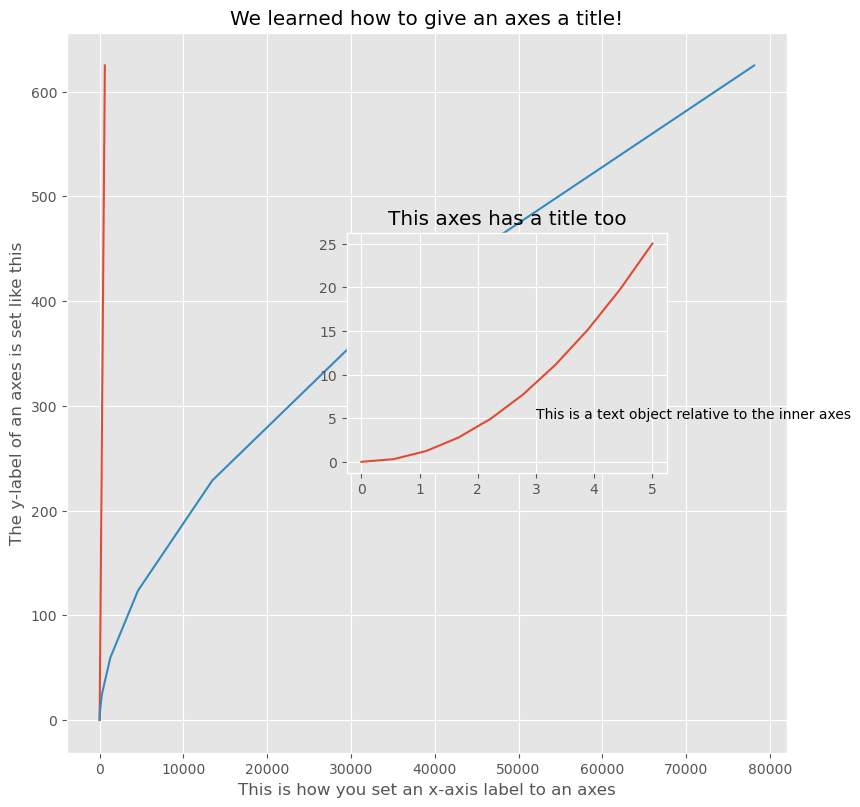

In [290]:
### Make the figure and axes objects ###
example_figure = plt.figure(figsize =(8,8), dpi = 100) #you give the size of the figure as a tuple of inches
example_axes_outer = example_figure.add_axes([0.1, 0.1, 0.9, 0.9]) #The list argument gives the relative location of the axes in percentage from the corners of the figure. The order is left, bottom, right, top. 
example_axes_outer.set_xlabel("This is how you set an x-axis label to an axes")
example_axes_outer.set_ylabel("The y-label of an axes is set like this")
example_axes_outer.set_title("We learned how to give an axes a title!")
example_axes_inner = example_figure.add_axes([0.45, 0.45, 0.4, 0.3])
example_axes_inner.set_title("This axes has a title too")

### Add something to the axes ###
example_axes_inner.plot(x_example_data, y_example_data)

# Multiple things, like lines can be plotted on same axis. 
example_axes_outer.plot(x_example_data**4, y_example_data**2)
example_axes_outer.plot(x_example_data**7, y_example_data**2)

# If you want to add other objects, you add them to axes too, like text
# Now you specify the location relative to the parent axes
example_axes_inner.text(3, 5, "This is a text object relative to the inner axes")

#Many more things can be added to axes in a similar way, not just text. 
#For more information there are many good tutorials available for example in youtube. 

_________
## <font color = Green> 7. Visualizing attribute value distributions </font>
**a)** Plot four histrograms of the Breadth using the Sturges', Scott's, square root and Freedman-Diaconis' methods to determine the number of bins. How are the numbers of bins calculated? Compare the distributions of different ship types. Do you think this a feasible attribute for classification, why? 

- Tip: it would be nice to use subplots when you have more than one plot. 

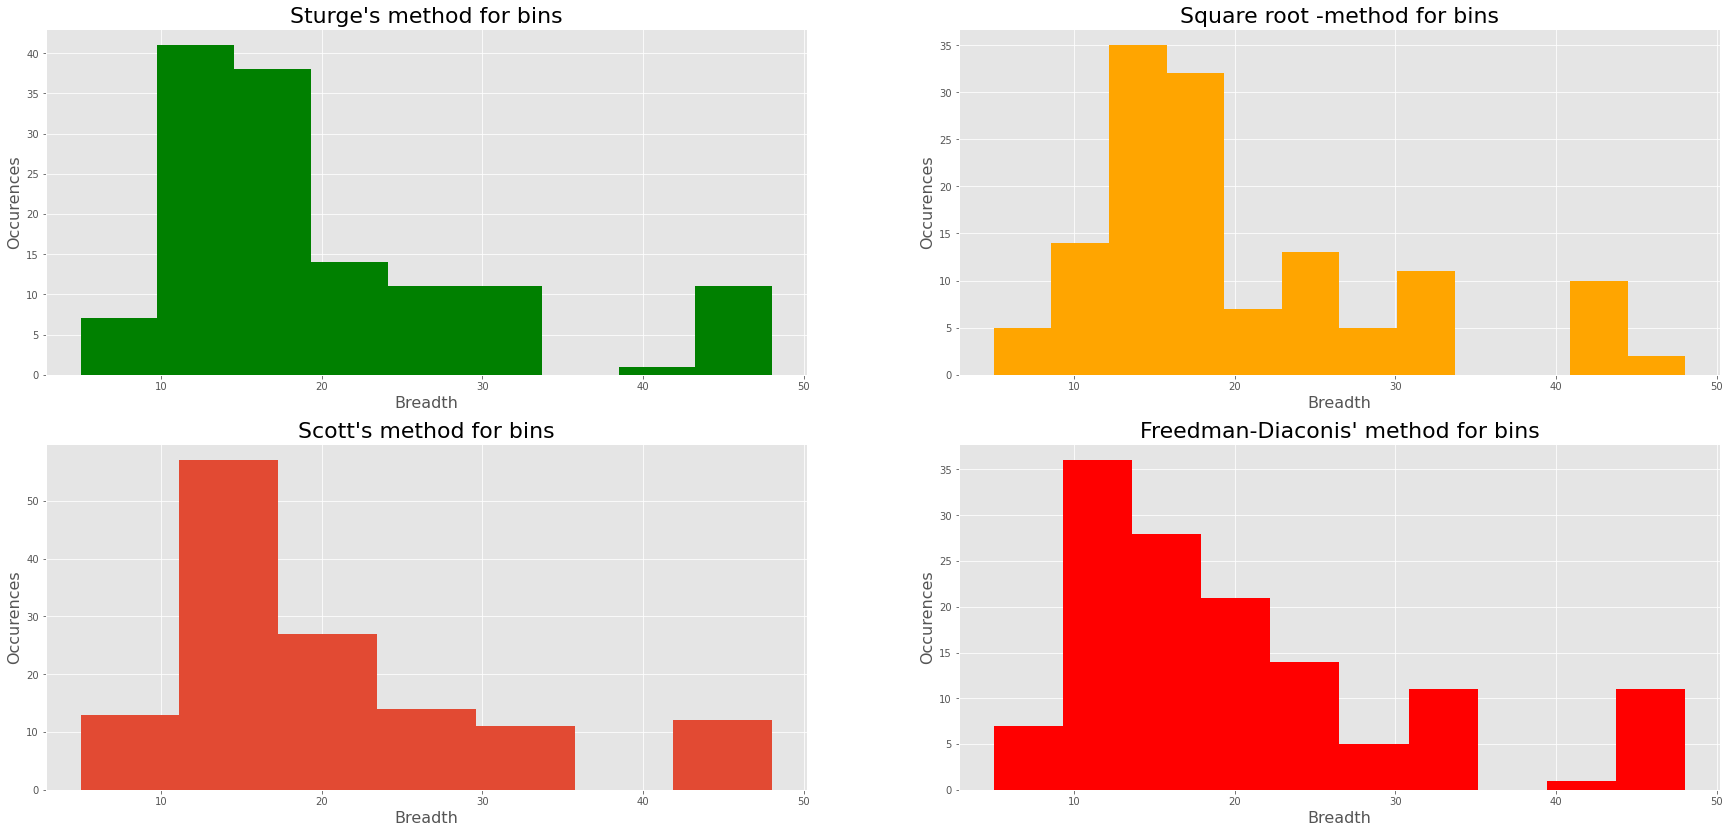

In [291]:
plt.figure(figsize=(30,14))

plt.subplot(2,2,1)
plt.title("Sturge's method for bins", fontsize=22)
plt.xlabel("Breadth", fontsize=16)
plt.ylabel("Occurences", fontsize=16)
plt.hist(shipdata_all['Breadth'], bins='sturges', color='green')

plt.subplot(2,2,2)
plt.title("Square root -method for bins", fontsize=22)
plt.xlabel("Breadth", fontsize=16)
plt.ylabel("Occurences", fontsize=16)
plt.hist(shipdata_all['Breadth'], bins='sqrt', color='orange')

plt.subplot(2,2,3)
plt.title("Scott's method for bins", fontsize=22)
plt.xlabel("Breadth", fontsize=16)
plt.ylabel("Occurences", fontsize=16)
plt.hist(shipdata_all['Breadth'], bins='scott')

plt.subplot(2,2,4)
plt.title("Freedman-Diaconis' method for bins", fontsize=22)
plt.xlabel("Breadth", fontsize=16)
plt.ylabel("Occurences", fontsize=16)
plt.hist(shipdata_all['Breadth'], bins='fd', color='red')

plt.show()

<font color = green> There are multiple ways to calculate the number of bins. It this example, four methods were used. The Sturge's method uses k = 1 + 3.322*og(n), where k is the number of bins and n the number of data observation points. The square root method calculates the square root of the number of observation points and rounds it up. Scott's method uses standard deviation as the reference point and Freedman-Diaconis' method is based on the interquartile range. This explains the differences between the histograms above.</font>

**b)** Compare the distributions of the Breadth variable between different ship types. Do you think this a feasible attribute for classification, why?
- *Tip What kind of plot can you do on a continuous variable? You only need to produce one plot, not multiple.*

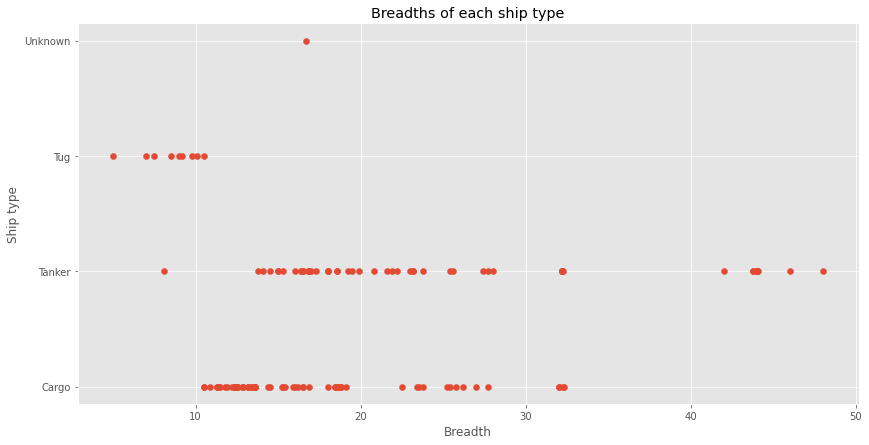

In [292]:
plt.figure(figsize=(14, 7))
plt.title('Breadths of each ship type')
plt.xlabel('Breadth')
plt.ylabel('Ship type')
plt.scatter(shipdata_all['Breadth'], shipdata_all['Ship_type'])
plt.show()

<font color = green> By comparing the size ('Breadth') of the ship types, we get data that can separate big ships from smaller ones, but since there are ships in the same size-range, it is most likely not the best way to categorize the ships. </font>

**c)**	Explain what a boxplot is. Plot them for the numeric attributes (excluding 'Origin') grouped by the ship type. Do you see outliers that require some action?

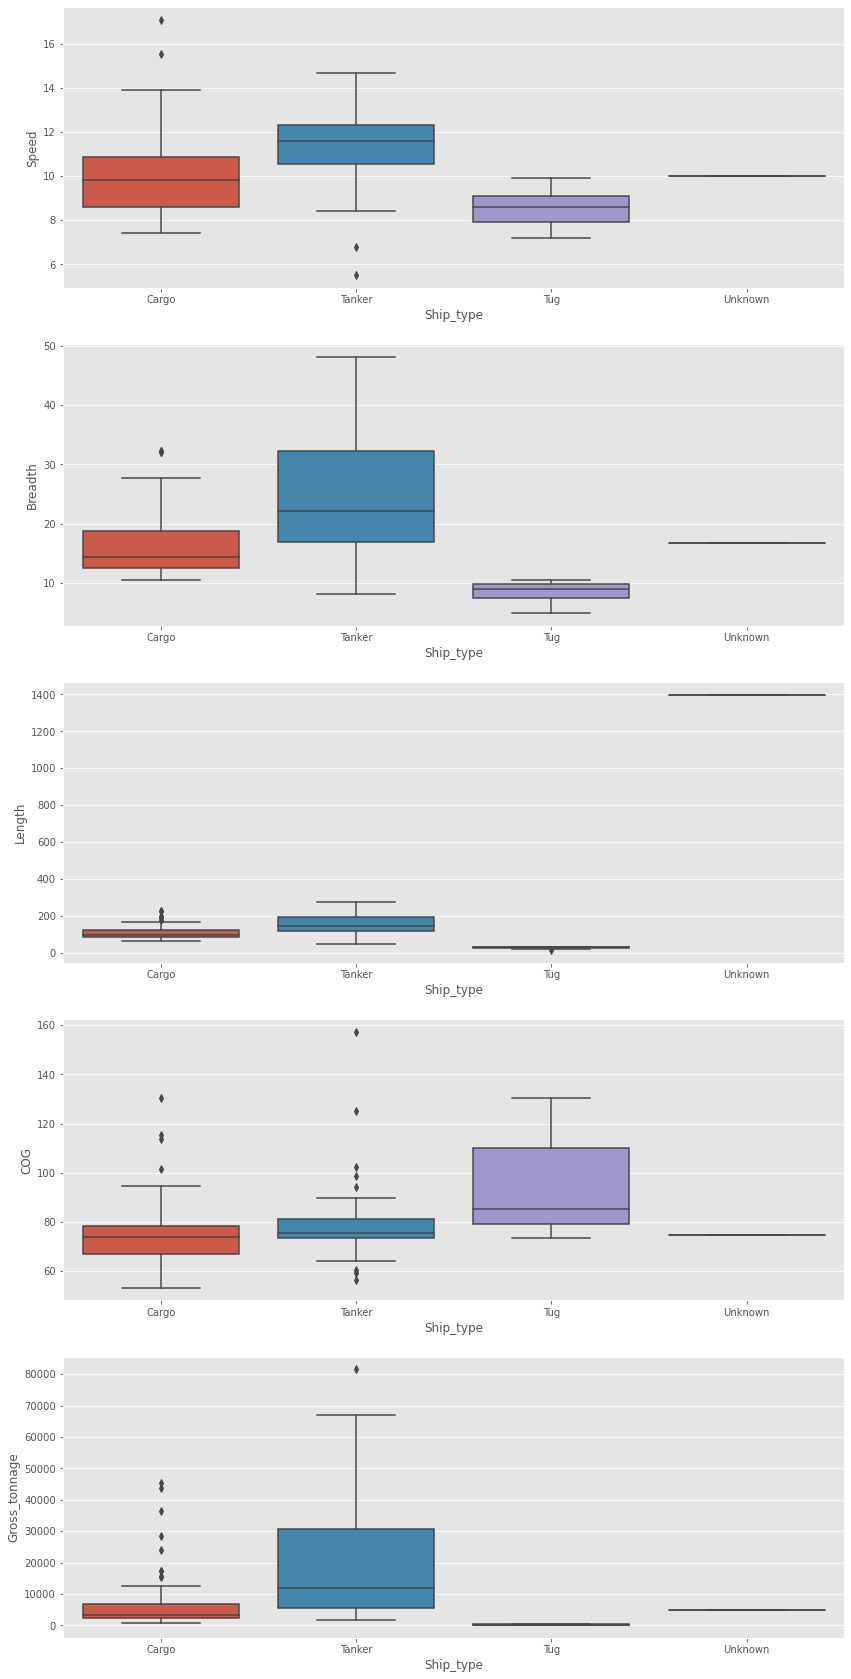

In [293]:
fig, axes = plt.subplots(5, 1, figsize=(14, 30))


sns.boxplot(data=shipdata_all, ax=axes[0], x='Ship_type', y='Speed')
sns.boxplot(data=shipdata_all, ax=axes[1], x='Ship_type', y='Breadth')
sns.boxplot(data=shipdata_all, ax=axes[2], x='Ship_type', y='Length')
sns.boxplot(data=shipdata_all, ax=axes[3], x='Ship_type', y='COG')
sns.boxplot(data=shipdata_all, ax=axes[4], x='Ship_type', y='Gross_tonnage')
plt.show()

<font color = green> In boxplots, the data is visualized in a way that shows where _most of the instances_ lie thus making it easier to understand how the values are distributed. </font>

##  <font color = purple> 8. Relationships between attributes

#### a) Plot pairwise scatter plots of the numerical attributes. What kind of relationships can you see? Can you see any outliers? 
- *this can be done in one line*

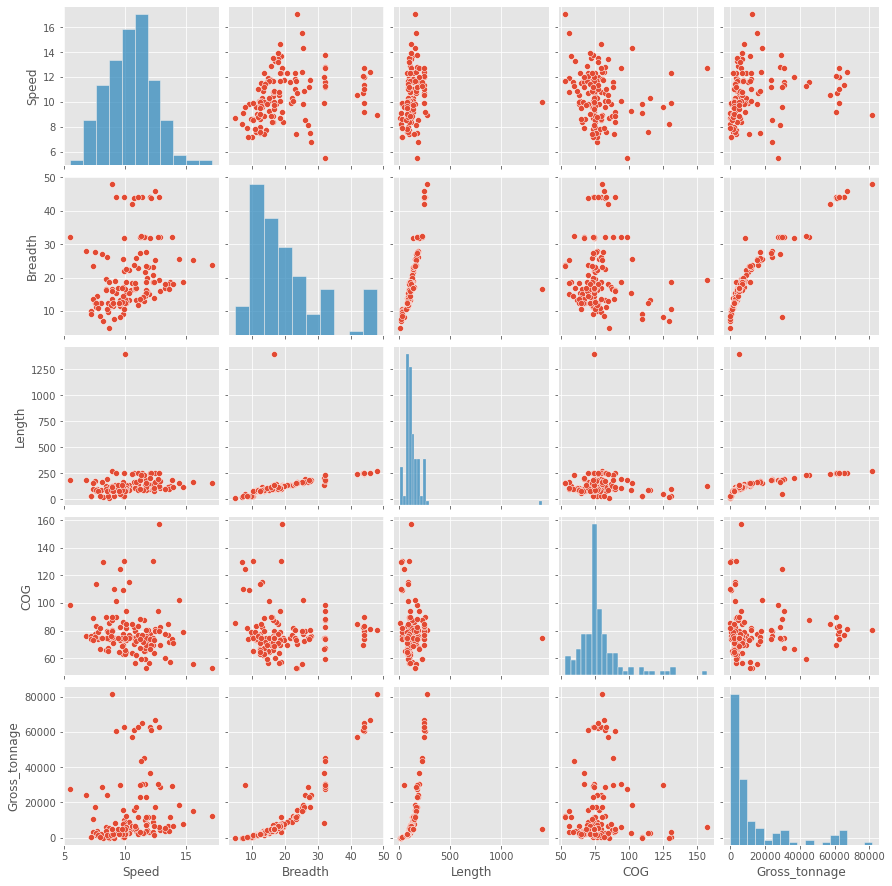

In [294]:
sns.pairplot(shipdata_all[['Speed', 'Breadth', 'Length', 'COG', 'Gross_tonnage']])

<font color = green> There are barely any (from the plots visible) correlation between 'Speed' and 'COG' and other attributes. Then, for example, 'Breadth' and 'Length' seem to correlate, as well as the measurements and 'Gross_tonnage'.</font>

**b)** Make a new clean dataframe without outlier(s) and replot. What difference do you see? 
- *include the most relevant attributes only, or limit to those needed in next task*

In [295]:
from scipy import stats

shipdata_numeric = shipdata_all[['Speed', 'Breadth', 'Length', 'COG', 'Gross_tonnage']]
z = np.abs(stats.zscore(shipdata_numeric))
outliers_removed = (abs_z_scores < 3).all(axis=1) # 3 chosen as threashold, because it was the most common

filtered_shipdata = shipdata_all[outliers_removed]

print(len(filtered_shipdata))

127


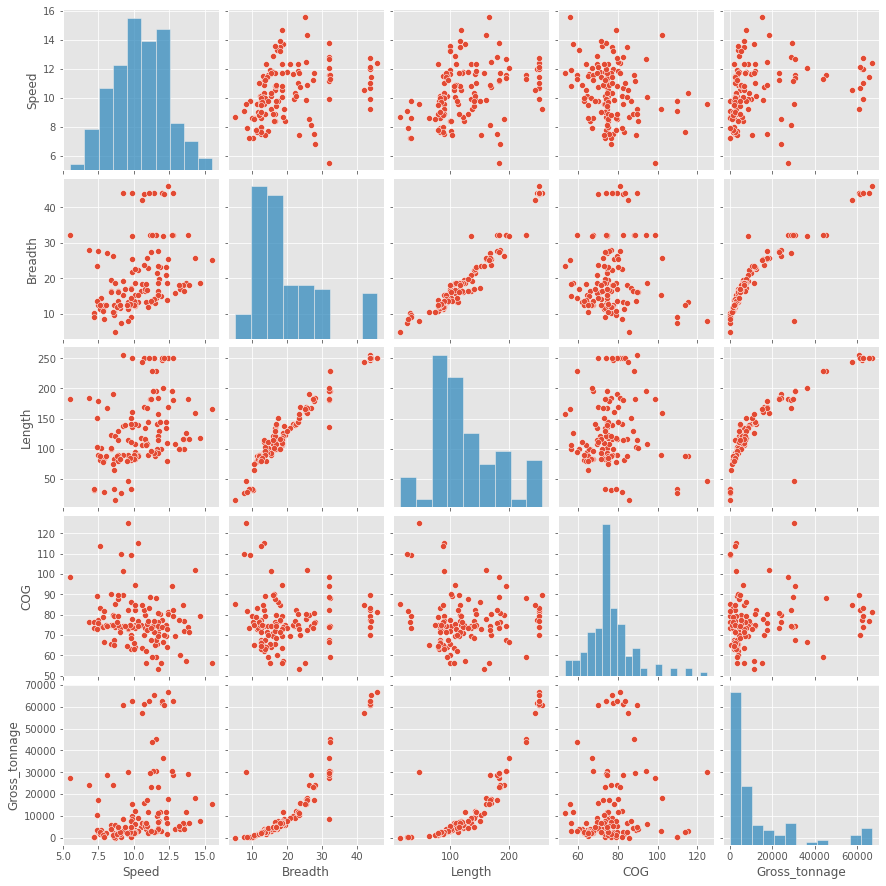

In [296]:
sns.pairplot(filtered_shipdata[['Speed', 'Breadth', 'Length', 'COG', 'Gross_tonnage']])

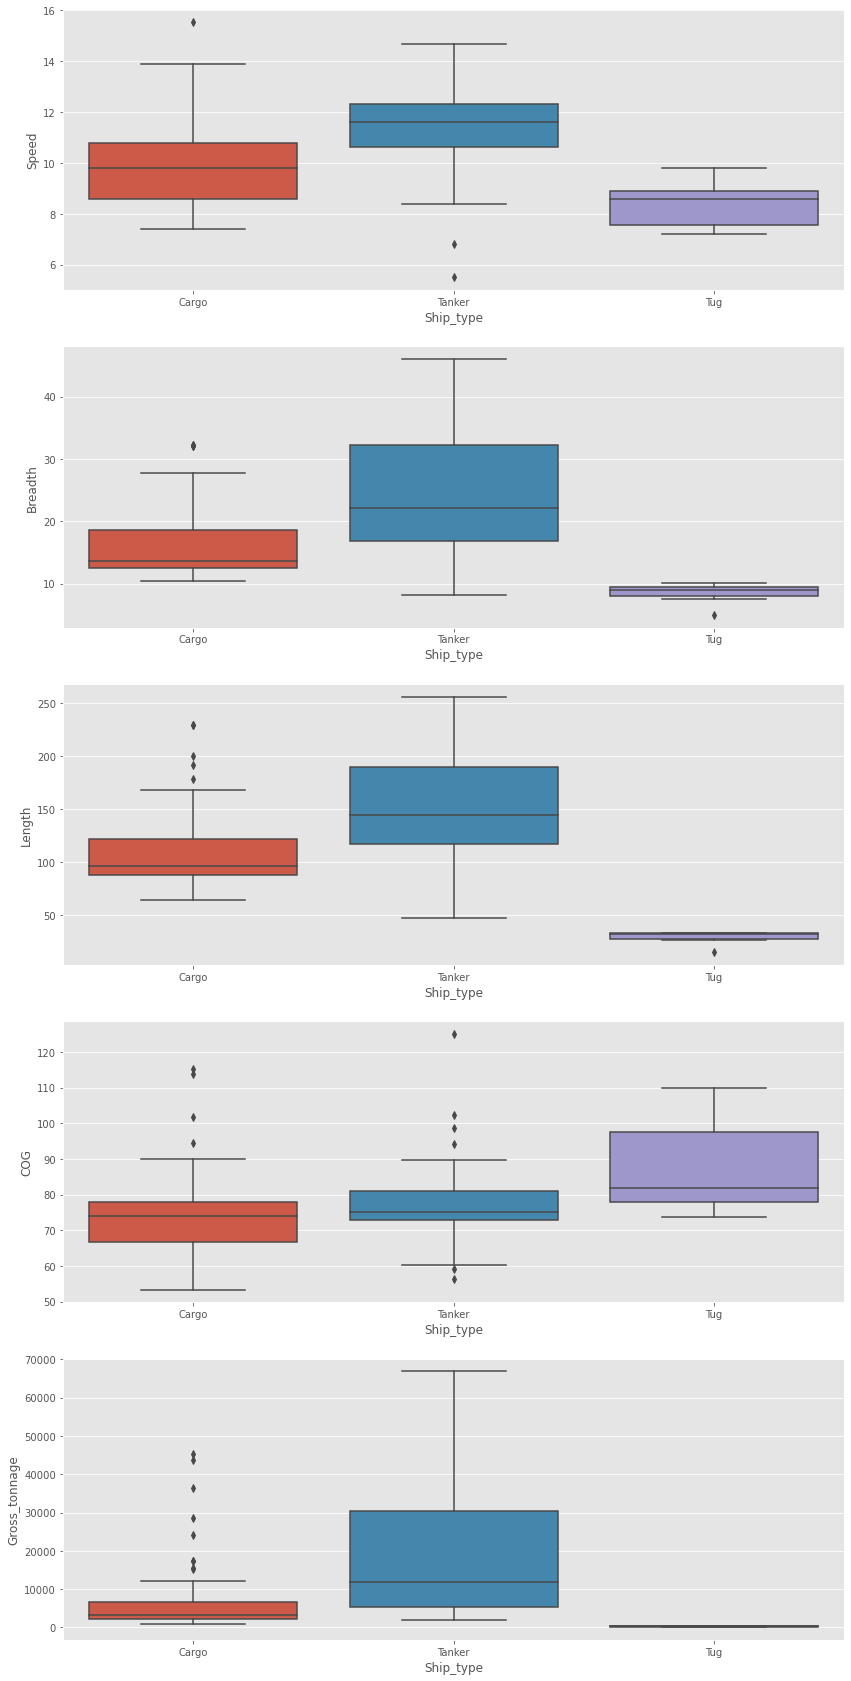

In [297]:
fig, axes = plt.subplots(5, 1, figsize=(14, 30))


sns.boxplot(data=filtered_shipdata, ax=axes[0], x='Ship_type', y='Speed')
sns.boxplot(data=filtered_shipdata, ax=axes[1], x='Ship_type', y='Breadth')
sns.boxplot(data=filtered_shipdata, ax=axes[2], x='Ship_type', y='Length')
sns.boxplot(data=filtered_shipdata, ax=axes[3], x='Ship_type', y='COG')
sns.boxplot(data=filtered_shipdata, ax=axes[4], x='Ship_type', y='Gross_tonnage')
plt.show()

<font color = green> The completely off-grid spots seem to be gone. This implicates that at least some of the outliers were removed succesfully. It is best visible on the boxplots. </font>

__________
## <font color = purple> 9. Correlation and heatmap </font>

**a)** Explain what are
- Pearson's correlation
- Spearman's rho and 
- Kendall's tau?

<font color = green> 
    
- Pearson's correlation is a way of normalizing correlation by calculating a coefficient by dividing the covariance with the product of std:s
    
- Spearman's rho is Pearson's coefficient applied between rank variables.
    
- Kendall's tau is a measure of association between two measured variables. It has several variations.

**b)** Calculate the correlation coefficient matrices. What kind of relationships there are between the attributes? You can use a heatmap to visualize the matrices and more easily see the strength of the relationship. **See what kind of a difference there is between the cleaned dataset and the non-cleaned dataset.**

In [298]:
print("Non-cleaned dataset" + "\n" + str(shipdata_all[['Speed', 'Breadth', 'Length', 'COG', 'Gross_tonnage']].corr()))
print("\n")
print("Cleaned dataset" + "\n" + str(filtered_shipdata[['Speed', 'Breadth', 'Length', 'COG', 'Gross_tonnage']].corr()))

Non-cleaned dataset
                  Speed   Breadth    Length       COG  Gross_tonnage
Speed          1.000000  0.298310  0.125496 -0.162097       0.199518
Breadth        0.298310  1.000000  0.420382 -0.056576       0.937880
Length         0.125496  0.420382  1.000000 -0.077201       0.378063
COG           -0.162097 -0.056576 -0.077201  1.000000       0.020717
Gross_tonnage  0.199518  0.937880  0.378063  0.020717       1.000000


Cleaned dataset
                  Speed   Breadth    Length       COG  Gross_tonnage
Speed          1.000000  0.325691  0.330626 -0.227882       0.250431
Breadth        0.325691  1.000000  0.964619  0.011256       0.938220
Length         0.330626  0.964619  1.000000 -0.034722       0.895772
COG           -0.227882  0.011256 -0.034722  1.000000       0.116050
Gross_tonnage  0.250431  0.938220  0.895772  0.116050       1.000000


<font color = green> The Pearson's correlation coefficient matrix seems to show more correlation in the cleaned dataset. This is expected, as outliers affect the correlation coefficients.</font>

____________
## <font color = dollargreen >   10. BONUS Dimensionality reduction</font>  
- <font color = red> Answers that only state what you can see are not enough. </font> You need to explain _why_ rather than what and demonstrate you understand what you are doing. By copypasting code from stackoverflow you will not learn much.
____________

- **a)** Explain what principal component analysis is.

<font color = green> Principal component analysis, or PCA, is a way to reduce the dimensionality of data. It is done to simplify the data as large datasets are harder to work with. With PCA, it is possible to analyze smaller entities of valid data while maintaining the important numerics.
</font>

- **b)** Do it with and without z-score standardization. 

In [299]:
from sklearn.preprocessing import StandardScaler

features = ['Speed', 'Breadth', 'Length', 'COG', 'Gross_tonnage']

#WITH STANDARDIZATION

x = filtered_shipdata.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

principal_components_df = pd.DataFrame(data=principal_components, columns = [1,2])

print(principal_components_df.head())

          1         2
0 -0.956571 -0.889399
1 -0.032208 -1.010637
2  0.063209  0.006608
3  0.275823 -0.507587
4 -0.681772 -1.985949


In [300]:
y = filtered_shipdata.loc[:, features].values

pca = PCA(n_components=2)
principal_components = pca.fit_transform(y)

principal_components_df_2 = pd.DataFrame(data=principal_components, columns = [1,2])

print(principal_components_df_2.head())

              1          2
0 -10009.448183   2.198803
1  -7145.395378  -9.346705
2  -3445.340261 -23.504913
3  -3445.340363 -23.486839
4 -10206.433963  -4.672095


- **c)** Visualize the results with a scatter plot by projecting the data to the first two principal components.

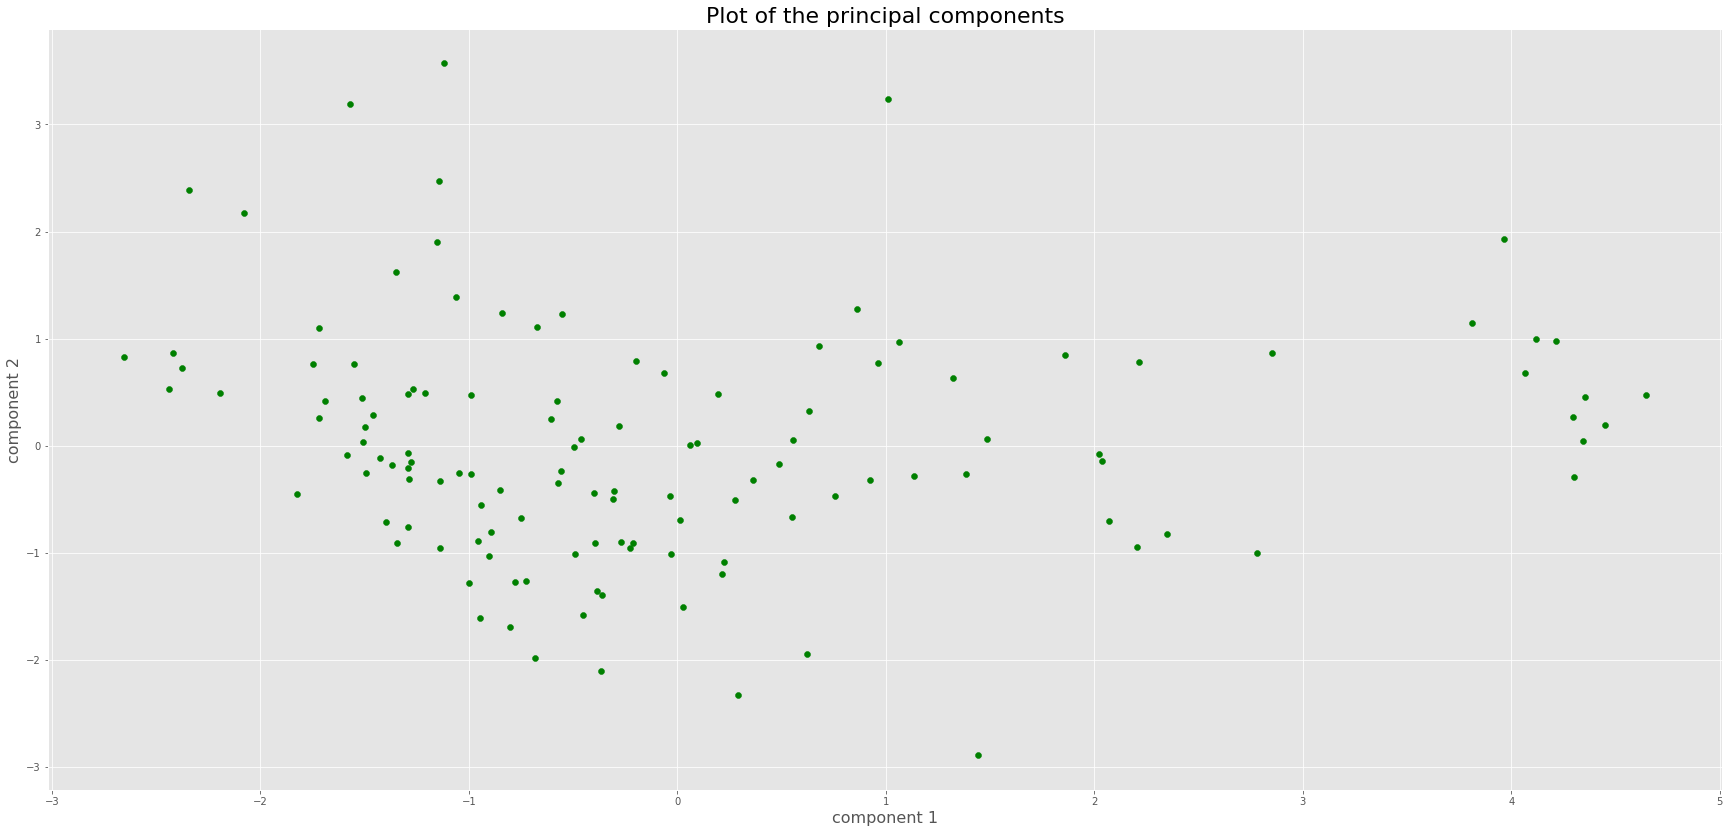

In [303]:
plt.figure(figsize=(30,14))
plt.title("Plot of the principal components", fontsize=22)
plt.xlabel("component 1", fontsize=16)
plt.ylabel("component 2", fontsize=16)
plt.scatter(principal_components_df[1], principal_components_df[2], color='green')
plt.show()

- **d)** How much of the variation is explained with the two principal components? What do you think this means? Where does the variation come from? 

In [304]:
print(principal_components_df.var())

1    3.027029
2    1.198274
dtype: float64


<font color = green> The variation comes from the variance of the original variables. This means that the principal components are in a way "melted" versions and don't necessarily contain all important information.  </font>